<a href="https://colab.research.google.com/github/Navodya-Pramodi/ResearchProject_MF/blob/Data-Pre-Processing/ResearchProjectFinalYear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install catboost
#!pip install dython
from imblearn.over_sampling import SMOTE #This is for SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score
from catboost import CatBoostClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.8 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df_1= pd.read_excel('/content/gdrive/MyDrive/Finalize Final Year Project/KN.xlsx')

df_1['PRODUCT_NAME']=df_1['PRODUCT_NAME'].replace(['MFF'],'Microfinance')
df_2=df_1.loc[df_1['PRODUCT_NAME'] == 'Microfinance']
df_2['LOAN_STEP']=df_2['LOAN_STEP'].astype(object)
df_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PRODUCT_CODE,PRODUCT_NAME,CONTRACT_NO,CONTRACT_STATUS,CONTRACT_DATE,LAST_PAYMENT_DATE,RESCHEDULE,DUE_FREQUENCY,RENTAL,NO_OF_RENTALS,...,INCOME,EXPENSE,LOAN_STEP,LOAN STATUS(FLAG),UnEmp_rate,GDP,Infl_rate,Agri_value,R_Populatoin,Population_DEN
0,MF,Microfinance,TRMF000017382,S,08-SEP-2015,06-JUN-2016,NO,W50,1512.01,50,...,50000.0,30000,8,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,139.20
1,MF,Microfinance,NEMF000029271,S,29-MAY-2015,03-MAY-2016,NO,W50,1764.01,50,...,60000.0,24000,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,408.80
2,MF,Microfinance,BGMF000029873,S,26-JUN-2015,19-APR-2017,NO,W50,1401.35,75,...,52000.0,39000,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,764.70
3,MF,Microfinance,WLMF000007048,S,25-SEP-2015,27-AUG-2016,NO,W50,1764.01,50,...,130000.0,101250,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,79.99
4,MF,Microfinance,MHMF000032099,S,25-AUG-2015,24-MAR-2016,NO,W50,2016.01,50,...,70000.0,35500,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,285.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8148,MFB,Microfinance,PWMFB000001952,S,01-OCT-2015,26-OCT-2016,NO,MO2,2108.37,24,...,35000.0,20000,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,285.00
8149,MFB,Microfinance,HWMFB000001730,S,01-JUN-2015,21-JAN-2017,NO,MO2,2108.37,24,...,70000.0,43000,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,119.90
8150,MFB,Microfinance,KAMFB000005189,S,01-APR-2015,02-MAR-2016,NO,MO2,2108.37,24,...,40000.0,12500,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,332.20
8151,MFB,Microfinance,KAMFB000005424,S,01-APR-2015,11-MAR-2016,NO,MO2,2108.37,24,...,35000.0,14500,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,332.20


In [5]:
df_2.dtypes


PRODUCT_CODE          object
PRODUCT_NAME          object
CONTRACT_NO           object
CONTRACT_STATUS       object
CONTRACT_DATE         object
LAST_PAYMENT_DATE     object
RESCHEDULE            object
DUE_FREQUENCY         object
RENTAL               float64
NO_OF_RENTALS          int64
PAID_RENTALS         float64
ARREARS_AGE          float64
GENDER                object
BRANCH                object
CITY                  object
DISTRICT_NAME         object
PROVINCE_NAME         object
FINANCE_AMOUNT       float64
EFFECTIVE_RATE       float64
AGE                    int64
MARITAL_STATUS        object
INCOME               float64
EXPENSE                int64
LOAN_STEP             object
LOAN STATUS(FLAG)     object
UnEmp_rate           float64
GDP                  float64
Infl_rate            float64
Agri_value           float64
R_Populatoin         float64
Population_DEN       float64
dtype: object

In [6]:
df=df_2.drop(['PRODUCT_NAME','RESCHEDULE','CONTRACT_STATUS','PAID_RENTALS','BRANCH','CITY','PROVINCE_NAME','LAST_PAYMENT_DATE','CONTRACT_NO','CONTRACT_DATE','ARREARS_AGE'], axis=1)
df.isnull().sum()

PRODUCT_CODE          0
DUE_FREQUENCY         0
RENTAL                0
NO_OF_RENTALS         0
GENDER                1
DISTRICT_NAME         0
FINANCE_AMOUNT        0
EFFECTIVE_RATE        0
AGE                   0
MARITAL_STATUS       28
INCOME                0
EXPENSE               0
LOAN_STEP             0
LOAN STATUS(FLAG)     0
UnEmp_rate            0
GDP                   0
Infl_rate             0
Agri_value            0
R_Populatoin          0
Population_DEN        0
dtype: int64

In [7]:
df = df.rename(columns={'LOAN STATUS(FLAG)': 'LOAN_STATUS'})
df

,PRODUCT_CODE,DUE_FREQUENCY,RENTAL,NO_OF_RENTALS,GENDER,DISTRICT_NAME,FINANCE_AMOUNT,EFFECTIVE_RATE,AGE,MARITAL_STATUS,INCOME,EXPENSE,LOAN_STEP,LOAN_STATUS,UnEmp_rate,GDP,Infl_rate,Agri_value,R_Populatoin,Population_DEN
0,MF,W50,1512.01,50,F,TRINCOMALEE,60000.0,47.35,51,M,50000.0,30000,8,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,139.20
1,MF,W50,1764.01,50,F,NUWARA ELIYA,70000.0,47.35,32,M,60000.0,24000,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,408.80
2,MF,W50,1401.35,75,F,KALUTARA,75000.0,47.35,70,M,52000.0,39000,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,764.70
3,MF,W50,1764.01,50,F,MONERAGALA,70000.0,47.35,37,M,130000.0,101250,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,79.99
4,MF,W50,2016.01,50,F,BADULLA,80000.0,47.35,42,M,70000.0,35500,7,NOT DEFAULT,4.19,4.9,3.18,8.0,81.78,285.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8148,MFB,MO2,2108.37,24,F,BADULLA,40000.0,47.35,36,M,35000.0,20000,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,285.00
8149,MFB,MO2,2108.37,24,F,ANURADHAPURA,40000.0,47.35,29,M,70000.0,43000,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,119.90
8150,MFB,MO2,2108.37,24,F,RATNAPURA,40000.0,47.35,61,M,40000.0,12500,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,332.20
8151,MFB,MO2,2108.37,24,F,RATNAPURA,40000.0,47.35,28,M,35000.0,14500,1,NOT DEFAULT,4.52,5.0,3.77,8.1,81.74,332.20


**Data pre-processing**

Missing value imputation

In [8]:
#Gender [NAN,missings] replace with 'F'( mode )
df["GENDER"].fillna("F",inplace=True) 

#Marital satus [NAN] replace with "M"( mode )
df["MARITAL_STATUS"].fillna("M",inplace=True)

#Marital status "O" also replace with "M"( mode )
df["MARITAL_STATUS"]=df["MARITAL_STATUS"].replace({"O": "M"})

#EFFECTIVE_RATE [NAN/0] replace with (mean)
df['EFFECTIVE_RATE']=df['EFFECTIVE_RATE'].fillna(df['EFFECTIVE_RATE'].mean())
df.columns

Index(['PRODUCT_CODE', 'DUE_FREQUENCY', 'RENTAL', 'NO_OF_RENTALS', 'GENDER',
       'DISTRICT_NAME', 'FINANCE_AMOUNT', 'EFFECTIVE_RATE', 'AGE',
       'MARITAL_STATUS', 'INCOME', 'EXPENSE', 'LOAN_STEP', 'LOAN_STATUS',
       'UnEmp_rate', 'GDP', 'Infl_rate', 'Agri_value', 'R_Populatoin',
       'Population_DEN'],
      dtype='object')

In [9]:
df['DUE_FREQUENCY'].value_counts()

W50    5260
MO2     673
Name: DUE_FREQUENCY, dtype: int64

In [10]:
df['MARITAL_STATUS'].unique()

array(['M', 'W', 'S', 'D', 'U'], dtype=object)

In [11]:
df['LOAN_STATUS'].unique()

array(['NOT DEFAULT', ' DEFAULT'], dtype=object)

**Outlier Detection**

In [12]:
import matplotlib.pyplot as plt

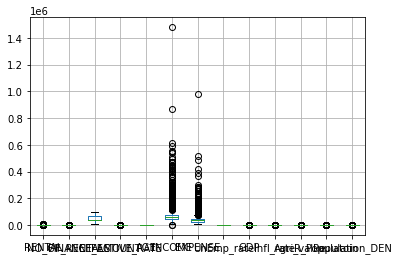

In [13]:
boxplot=df.boxplot(column=["RENTAL",'NO_OF_RENTALS','FINANCE_AMOUNT','EFFECTIVE_RATE','AGE','INCOME','EXPENSE','UnEmp_rate', 'GDP', 'Infl_rate','Agri_value','R_Populatoin','Population_DEN']) 